## Text Processing

In [1]:
%load_ext watermark
%watermark -v -p numpy,mlxtend,pandas,polars,omegaconf --conda

Python implementation: CPython
Python version       : 3.11.8
IPython version      : 8.22.2

numpy    : 1.26.4
mlxtend  : 0.23.1
pandas   : 2.2.1
polars   : 0.20.18
omegaconf: 2.3.0

conda environment: torch_p11



In [2]:
# Built-in library
from pathlib import Path
import re
import json
from typing import Any, Optional, Union
import logging
import warnings

# Standard imports
import numpy as np
import numpy.typing as npt
from pprint import pprint
import pandas as pd
import polars as pl
from rich.console import Console
from rich.theme import Theme

custom_theme = Theme(
    {
        "info": "#76FF7B",
        "warning": "#FBDDFE",
        "error": "#FF0000",
    }
)
console = Console(theme=custom_theme)

# Visualization
import matplotlib.pyplot as plt


# Pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Polars settings
pl.Config.set_fmt_str_lengths(1_000)
pl.Config.set_tbl_cols(n=1_000)

warnings.filterwarnings("ignore")


# Black code formatter (Optional)
%load_ext lab_black

# auto reload imports
%load_ext autoreload
%autoreload 2

In [3]:
import os
from tqdm import tqdm


def process_imdb_data(basepath: str, total_files: int = 50_000) -> pd.DataFrame:
    """
    Process IMDB movie review data and create a DataFrame.

    Parameters
    ----------
    basepath : str
        The base path to the IMDB dataset directory.
    total_files : int, optional
        The total number of files to process (default is 50,000).

    Returns
    -------
    pd.DataFrame
        A DataFrame containing processed movie reviews and their sentiments.
        Shape: (n_samples, 2)
        Columns: ['review', 'sentiment']
    """
    labels: dict[str, int] = {"pos": 1, "neg": 0}
    df: pd.DataFrame = pd.DataFrame(columns=["review", "sentiment"])

    with tqdm(total=total_files, desc="Processing files") as pbar:
        for s in ("test", "train"):
            for l in ("pos", "neg"):
                path: str = os.path.join(basepath, s, l)
                for file in sorted(os.listdir(path)):
                    with open(
                        os.path.join(path, file), "r", encoding="utf-8"
                    ) as infile:
                        txt: str = infile.read()
                    result: pd.DataFrame = pd.DataFrame(
                        [[txt, labels[l]]], columns=["review", "sentiment"]
                    )
                    df = pd.concat([df, result], ignore_index=True)
                    pbar.update(1)
    return df

In [4]:
basepath: str = "../../data/aclImdb/"
# data: pd.DataFrame = process_imdb_data(basepath=basepath)

In [5]:
basepath: str = "../../data/ImDB_data.parquet"
df: pl.DataFrame = pl.read_parquet(basepath)
df.head()

review,sentiment
str,i64
"""I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge.""",1
"""Actor turned director Bill Paxton follows up his promising debut, the Gothic-horror ""Frailty"", with this family friendly sports drama about the 1913 U.S. Open where a young American caddy rises from his humble background to play against his Bristish idol in what was dubbed as ""The Greatest Game Ever Played."" I'm no fan of golf, and these scrappy underdog sports flicks are a dime a dozen (most recently done to grand effect with ""Miracle"" and ""Cinderella Man""), but some how this film was enthralling all the same.<br /><br />The film starts with some creative opening credits (imagine a Disneyfied version of the animated opening credits of HBO's ""Carnivale"" and ""Rome""), but lumbers along slowly for its first by-the-numbers hour. Once the action moves to the U.S. Open things pick up very well. Paxton does a nice job and shows a knack for effective directorial flourishes (I loved the rain-soaked montage of the action on day two of the open) that propel the plot further or add some unexpecte…",1
"""As a recreational golfer with some knowledge of the sport's history, I was pleased with Disney's sensitivity to the issues of class in golf in the early twentieth century. The movie depicted well the psychological battles that Harry Vardon fought within himself, from his childhood trauma of being evicted to his own inability to break that glass ceiling that prevents him from being accepted as an equal in English golf society. Likewise, the young Ouimet goes through his own class struggles, being a mere caddie in the eyes of the upper crust Americans who scoff at his attempts to rise above his standing. <br /><br />What I loved best, however, is how this theme of class is manifested in the characters of Ouimet's parents. His father is a working-class drone who sees the value of hard work but is intimidated by the upper class; his mother, however, recognizes her son's talent and desire and encourages him to pursue his dream of competing against those who think he is inferior.<br /><br /…",1
"""I saw this film in a sneak preview, and it is delightful. The cinematography is unusually creative, the acting is good, and the story is fabulous. If this movie does not do well, it won't be because it doesn't deserve to. Before this film, I didn't realize how charming Shia Lebouf could be. He does a marvelous, self-contained, job as the lead. There's something incredibly sweet about him, and it makes the movie even better. The other actors do a good job as well, and the film contains moments of really high suspense, more than one might expect from a movie about golf. Sports movies are a dime a dozen, but this one stands out. <br /><br />This is one I'd recommend to anyone.""",1
"""Bill Paxton has taken the true story of the 1913 US golf open and made a film that is about much more than an extra-ordinary game of golf. The film also deals directly with the class tensions of the early twentieth century and touches upon the profound anti-Catholic prejudices of both the British and American establishments. But at heart the film is about that perennial favourite of triumph against the odds.<br /><br />The acting is exemplary throu

In [6]:
df.shape

(50000, 2)

In [7]:
console.print(df.select("review").to_series().to_list()[:2])

[
    "I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was 
reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher 
played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The
sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was
sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second 
half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying 
desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you 
judge.",
    'Actor turned director Bill Paxton follows up his promising debut, the Gothic-horror "Frailty", with this 
family friendly sports drama about the 1913 U.S. Open where a young American caddy rises from his humble background
to play against his Bristish idol in what was dubbed as "The Greatest Game Ever Played." I\'m no fan of golf, and 
these scrappy underdog sports flicks are a dime a dozen (most recently done to grand effect with "Miracle" and 
"Cinderella Man"), but some how this film was enthralling all the same.<br /><br />The film starts with some 
creative opening credits (imagine a Disneyfied version of the animated opening credits of HBO\'s "Carnivale" and 
"Rome"), but lumbers along slowly for its first by-the-numbers hour. Once the action moves to the U.S. Open things 
pick up very well. Paxton does a nice job and shows a knack for effective directorial flourishes (I loved the 
rain-soaked montage of the action on day two of the open) that propel the plot further or add some unexpected 
psychological depth to the proceedings. There\'s some compelling character development when the British Harry 
Vardon is haunted by images of the aristocrats in black suits and top hats who destroyed his family cottage as a 
child to make way for a golf course. He also does a good job of visually depicting what goes on in the players\' 
heads under pressure. Golf, a painfully boring sport, is brought vividly alive here. Credit should also be given 
the set designers and costume department for creating an engaging period-piece atmosphere of London and Boston at 
the beginning of the twentieth century.<br /><br />You know how this is going to end not only because it\'s based 
on a true story but also because films in this genre follow the same template over and over, but Paxton puts on a 
better than average show and perhaps indicates more talent behind the camera than he ever had in front of it. 
Despite the formulaic nature, this is a nice and easy film to root for that deserves to find an audience.'
]

### Text Cleaning

In [8]:
def preprocessor(text: str) -> str:
    """
    Preprocess the input text by removing HTML tags, extracting emoticons,
    and converting to lowercase.

    Parameters
    ----------
    text : str
        The input text to be preprocessed.

    Returns
    -------
    str
        The preprocessed text with HTML tags removed, emoticons extracted,
        and converted to lowercase.
    """
    text = re.sub(r"<[^>]*>", "", text)
    emoticons: list[str] = re.findall(r"(?::|;|=)(?:-)?(?:\)|\(|D|P)", text)
    text = re.sub(r"[\W]+", " ", text.lower()) + " ".join(emoticons).replace(r"-", "")
    return text

In [9]:
# The prepocessor removes all non-word characters, html tags, converts the text
# to lower case and appends the emoticons to the end of the text. This is because a
# bag of words model doesn't conssider the order of words.
text: str = ":) Chukwu oma ki bu :) <some html tags> :-( :("
preprocessor(text)

' chukwu oma ki bu :) :) :( :('

### Comment

- A bag of words (BoW) model represents text data by focusing solely on the presence and frequency of words, completely disregarding the order in which those words appear.

In [10]:
html_pattern: str = r"<[^>]*>"
emoticons_pattern: str = r"(?::|;|=)(?:-)?(?:\)|\(|D|P)"
non_words_pattern: str = r"[\W]+"

sample_data: pl.DataFrame = pl.DataFrame(
    data={
        "review": [
            ":) Chukwu oma ki bu :) <some html tags> :-( :(",
            "I'm :) gonna add this <img src='image_url_can_be_found_here'>",
        ]
    }
)
sample_data

review
str
""":) Chukwu oma ki bu :) <some html tags> :-( :("""
"""I'm :) gonna add this <img src='image_url_can_be_found_here'>"""


In [11]:
# Polars Expressive Language (PEL) version
sample_data = (
    sample_data.with_columns(
        cleaned_review=pl.col("review")
        .str.replace_all(html_pattern, "")
        .str.replace_all(non_words_pattern, " "),
        emoticon=pl.col("review")
        .str.extract_all(emoticons_pattern)
        .map_elements(lambda x: " ".join(x)),
    )
    .with_columns(
        cleaned_review=pl.concat_str(
            pl.col("cleaned_review"), pl.col("emoticon"), separator=" "
        )
    )
    .drop(["emoticon"])
)

sample_data

review,cleaned_review
str,str
""":) Chukwu oma ki bu :) <some html tags> :-( :(""",""" Chukwu oma ki bu :) :) :-( :("""
"""I'm :) gonna add this <img src='image_url_can_be_found_here'>""","""I m gonna add this :)"""


<br><hr>

### Comment (Regarding the 2 versions of the code)

- **Version 1 (Recommended)**

```py
%%timeit
sample_data.with_columns(
    cleaned_review=pl.col("review")
    .str.replace_all(html_pattern, "")
    .str.replace_all(non_words_pattern, " "),
    emoticon=pl.col("review")
    .str.extract_all(emoticons_pattern)
    .map_elements(lambda x: " ".join(x)),
).with_columns(
    cleaned_review=pl.concat_str(
        pl.col("cleaned_review"), pl.col("emoticon"), separator=" "
    )
).drop(
    ["emoticon"]
)

# 1.63 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
```

<hr>

- **Version 2 (Using `.map_elements(custom_func)`)**

  - Equivalent of `df["col].apply(custom_func)` in Pandas
  - This is slower.

```py
%%timeit
sample_data.with_columns(cleaned_text=pl.col("review").map_elements(preprocessor))

# 2.2 ms ± 397 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
```
<hr><br>

In [12]:
df = (
    df.with_columns(
        cleaned_review=pl.col("review")
        .str.replace_all(html_pattern, "")
        .str.replace_all(non_words_pattern, " "),
        emoticon=pl.col("review")
        .str.extract_all(emoticons_pattern)
        .map_elements(lambda x: " ".join(x)),
    )
    .with_columns(
        cleaned_review=pl.concat_str(
            pl.col("cleaned_review"), pl.col("emoticon"), separator=" "
        )
    )
    .drop(["emoticon"])
)

df.head()

review,sentiment,cleaned_review
str,i64,str
"""I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge.""",1,"""I went and saw this movie last night after being coaxed to by a few friends of mine I ll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy I was wrong Kutcher played the character of Jake Fischer very well and Kevin Costner played Ben Randall with such professionalism The sign of a good movie is that it can toy with our emotions This one did exactly that The entire theater which was sold out was overcome by laughter during the first half of the movie and were moved to tears during the second half While exiting the theater I not only saw many women in tears but many full grown men as well trying desperately not to let anyone see them crying This movie was great and I suggest that you go see it before you judge """
"""Actor turned director Bill Paxton follows up his promising debut, the Gothic-horror ""Frailty"", with this family friendly sports drama about the 1913 U.S. Open where a young American caddy rises from his humble background to play against his Bristish idol in what was dubbed as ""The Greatest Game Ever Played."" I'm no fan of golf, and these scrappy underdog sports flicks are a dime a dozen (most recently done to grand effect with ""Miracle"" and ""Cinderella Man""), but some how this film was enthralling all the same.<br /><br />The film starts with some creative opening credits (imagine a Disneyfied version of the animated opening credits of HBO's ""Carnivale"" and ""Rome""), but lumbers along slowly for its first by-the-numbers hour. Once the action moves to the U.S. Open things pick up very well. Paxton does a nice job and shows a knack for effective directorial flourishes (I loved the rain-soaked montage of the action on day two of the open) that propel the plot further or add some unexpecte…",1,"""Actor turned director Bill Paxton follows up his promising debut the Gothic horror Frailty with this family friendly sports drama about the 1913 U S Open where a young American caddy rises from his humble background to play against his Bristish idol in what was dubbed as The Greatest Game Ever Played I m no fan of golf and these scrappy underdog sports flicks are a dime a dozen most recently done to grand effect with Miracle and Cinderella Man but some how this film was enthralling all the same The film starts with some creative opening credits imagine a Disneyfied version of the animated opening credits of HBO s Carnivale and Rome but lumbers along slowly for its first by the numbers hour Once the action moves to the U S Open things pick up very well Paxton does a nice job and shows a knack for effective directorial flourishes I loved the rain soaked montage of the action on day two of the open that propel the plot further or add some unexpected psychological depth to the proceedings…"
"""As a recreational golfer with some knowledge of the sport's history, I was pleased with Disney's sensitivity to the issues of class in golf in the early twentieth century. The movie depicted well the psychological battles that Harry Vardon fought within himself, from his childhood trauma of being evicted to his own inability to break that

### Stopwords

- `Stopwords` are common words in a language that typically don't contribute much meaningful information to the overall meaning or sentiment of a text.

```txt
Consider these two movie reviews:

- "The movie was absolutely fantastic and I loved every minute of it."
- "The movie was terrible and I hated every second of it."


Without removing stopwords, both sentences would have similar representations in a bag-of-words model, as they share many common words like "the", "was", "and", "I", "every", "of", "it".

After removing stopwords:

- "movie absolutely fantastic loved minute"
- "movie terrible hated second"


Now the representations are much more distinct, focusing on the meaningful words that actually convey sentiment.
```

### Benefits

- This helps the classifier (ML model) to:

  - Reduce noise in the data
  - Focus on words that carry more semantic meaning
  - Decrease the `dimensionality` of the feature space
  - Potentially improve classification accuracy
  - Reduce computational complexity

```txt
By removing stopwords, we emphasize the words that truly differentiate positive and negative sentiments, making it easier for traditional ML algorithms to learn and classify effectively.
```

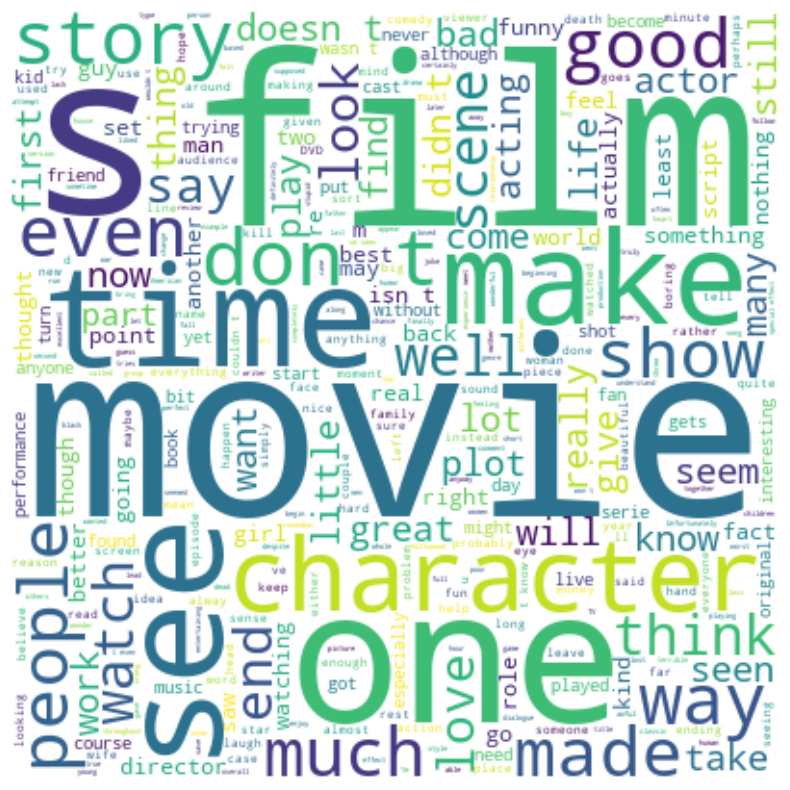

In [13]:
from wordcloud import WordCloud


wc: WordCloud = WordCloud(
    background_color="white",
    max_words=80_000,
    contour_width=3,
    contour_color="steelblue",
    width=400,
    height=400,
)

# Generate a word cloud
text: str = " ".join(df.select("cleaned_review").to_series().to_list())
word_cloud = wc.generate(text=text)

# Display the generated image
plt.figure(figsize=(8, 8))
plt.imshow(word_cloud, aspect="equal", interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()